Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyarrow as py
import fastparquet as fp

# Análisis EDA para el archivo USER.PARQUET

#### Importar los datos

In [2]:
# Cargar un archivo Parquet
ruta_archivo = "Dataset/Yelp/user.parquet"
df_user = pd.read_parquet(ruta_archivo)
df_user.head(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


## Tipo de datos del df

Esta es un función que cree para ver el tipo de datos de cada variable(columna) de dataset

Crear un funcion para analizar el tipo de datos proporcionados

In [3]:
# Funcion para revisar el tipo de dato de cada variable del dataset 
def tipo_datos(df):
    mi_dict = {"nombre_campo": [], "tipo_datos": []}
    for columna in df.columns:
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
    return df_info

In [8]:
df_user.shape

(2105597, 22)

## Valores Nulos

In [5]:
df_user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

## Valores Duplicados en user_id

In [6]:
df_user["user_id"].duplicated().sum()

117700

In [7]:
df_user[df_user["user_id"].duplicated()]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1987897,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1987898,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1987899,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
1987900,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
1987901,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
# Encuentra todos los duplicados, incluyendo la primera aparición
duplicated_rows = df_user[df_user["user_id"].duplicated(keep=False)]

# Agrupa por "user_id" para obtener todas las filas que comparten el mismo valor
duplicated_df = duplicated_rows.groupby("user_id", group_keys=False).apply(lambda x: x)

# Muestra el nuevo DataFrame
duplicated_df


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Filtra las filas donde la columna "user_id" contiene "qVc8ODYU5SZjKXVBgXdI7w"
walker_rows = duplicated_df[duplicated_df["user_id"].str.contains("qVc8ODYU5SZjKXVBgXdI7w", case=False, na=False)]

# Muestra el resultado
walker_rows


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1987897,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1998997,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180


In [13]:
#El argumento keep='first' hace que se mantenga la primera de las filas duplicadas y elimine la siguiente.
df_user = df_user.drop_duplicates(subset='user_id', keep='first')

In [14]:
#Se vuelve a revisar los datos duplicados
df_user[df_user["user_id"].duplicated()]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos


## Variable review_count

In [21]:
df_user["review_count"].max()

17473

In [20]:
df_user["review_count"].min()

0

In [25]:
df_user["review_count"].dtype

dtype('int64')

In [35]:
# Define intervalos de 1500 en 1500
bins = np.arange(0, df_user["review_count"].max() + 1500, 1500)

# Agrupar 'review_count' en intervalos definidos por 'bins'
df_user["review_group"] = pd.cut(df_user["review_count"], bins=bins)

# Contar la cantidad de datos en cada intervalo
data_count_by_group = df_user["review_group"].value_counts().sort_index()

# Crear un nuevo DataFrame con intervalos y cantidad de datos
df_intervals = pd.DataFrame({
    "Intervalos": data_count_by_group.index.astype(str),
    "Cantidad de Datos": data_count_by_group.values
})

# Mostrar el DataFrame
print(df_intervals)

        Intervalos  Cantidad de Datos
0        (0, 1500]            1987145
1     (1500, 3000]                609
2     (3000, 4500]                 67
3     (4500, 6000]                 11
4     (6000, 7500]                  3
5     (7500, 9000]                  3
6    (9000, 10500]                  1
7   (10500, 12000]                  0
8   (12000, 13500]                  1
9   (13500, 15000]                  0
10  (15000, 16500]                  0
11  (16500, 18000]                  3


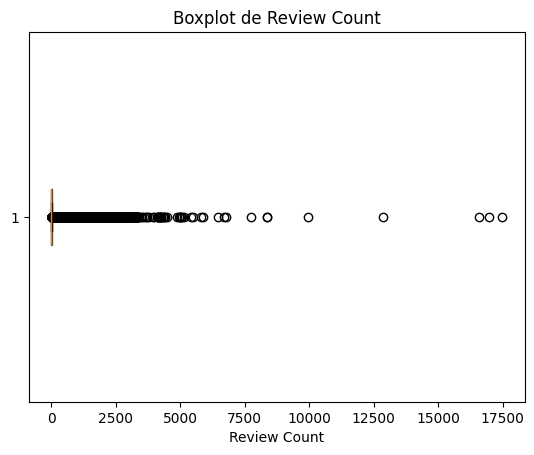

In [39]:
# Crear un gráfico de caja para visualizar la dispersión y los valores atípicos
plt.boxplot(df_user["review_count"], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', alpha=0.7))

# Configurar etiquetas y título
plt.xlabel("Review Count")
plt.title("Boxplot de Review Count")

# Mostrar el gráfico
plt.show()

## Variable fans

In [40]:
df_user["fans"].max()

12497

In [41]:
df_user["fans"].min()

0

In [42]:
# Define intervalos de 1000 en 1000
bins = np.arange(0, df_user["fans"].max() + 1000, 1000)

# Agrupar 'fans' en intervalos definidos por 'bins'
df_user["fans"] = pd.cut(df_user["fans"], bins=bins)

# Contar la cantidad de datos en cada intervalo
data_count_by_group_fans = df_user["fans"].value_counts().sort_index()

# Crear un nuevo DataFrame con intervalos y cantidad de datos
df_intervals_fans = pd.DataFrame({
    "Intervalos": data_count_by_group_fans.index.astype(str),
    "Cantidad de Datos": data_count_by_group_fans.values
})

# Mostrar el DataFrame
print(df_intervals_fans)

        Intervalos  Cantidad de Datos
0        (0, 1000]             409951
1     (1000, 2000]                 59
2     (2000, 3000]                 12
3     (3000, 4000]                  4
4     (4000, 5000]                  0
5     (5000, 6000]                  0
6     (6000, 7000]                  0
7     (7000, 8000]                  0
8     (8000, 9000]                  0
9    (9000, 10000]                  0
10  (10000, 11000]                  0
11  (11000, 12000]                  0
12  (12000, 13000]                  1


### Conclusiones finales

## Valores duplicados
* Se encontraron datos duplicados 117700 , se reviso y se elimino los mismos

## Tipo de datos
* dentro de la variable review_count y fans, los datos se encuentran muy dispersos, para un correcto analisis se recomienda no trabajar con datos muy dispersos